In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('KoreanHouse.csv')

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [6]:
# 연속형 데이터만 다루기 위하여 범주형 데이터는 제거
del data['CHAS']

In [7]:
# 타겟변수를 복사해 놓고, 타겟변수 컬럼을 지움.
medv = data['MEDV']
del data['MEDV']

In [8]:
# 차원 축소에 필요한 라이브러리를 import
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
# 정규화 객체를 생성
scaler = StandardScaler()

In [10]:
# data 전체를 정규화하여 scaler_data에 저장
scaler.fit(data)
scaler_data = scaler.transform(data)

In [11]:
# PCA 객체를 생성. 2차원 시각화를 위하여 변수는 2개로 설정
pca = PCA(n_components = 2)

In [12]:
# pca로 scaler_data를 학습
pca.fit(scaler_data)

PCA(n_components=2)

In [13]:
# pca로 변환한 데이터를 데이터 프레임으로 data2에 저장
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns=['pc1', 'pc2'])

In [14]:
data2.head()

,pc1,pc2
0,-1.997030,0.116612
1,-1.342724,-0.682635
2,-2.464487,1.534938
3,-2.979402,1.039243
4,-2.831358,1.131941


In [15]:
from sklearn.cluster import KMeans

In [16]:
# 1부터 30까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그림.
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

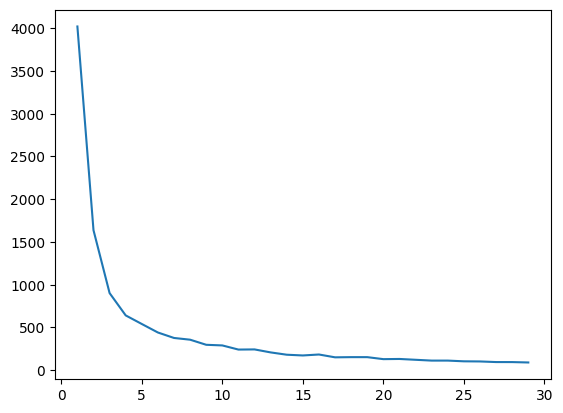

In [17]:
plt.plot(x, y)

In [18]:
# 군집의 개수를 4로 설정.
kmeans = KMeans(n_clusters=4)

In [19]:
kmeans.fit(data2)

KMeans(n_clusters=4)

In [20]:
# 각각의 예측된 군집 종류를 labels 컬럼에 넣어준다. 
data2['labels'] = kmeans.predict(data2)

In [21]:
data2.head()
# lebels가 1이라는 것은 해당 데이터가 1번 군집에 포함되었다는 의미

,pc1,pc2,labels
0,-1.997030,0.116612,0
1,-1.342724,-0.682635,0
2,-2.464487,1.534938,2
3,-2.979402,1.039243,2
4,-2.831358,1.131941,2


<Axes: xlabel='pc1', ylabel='pc2'>

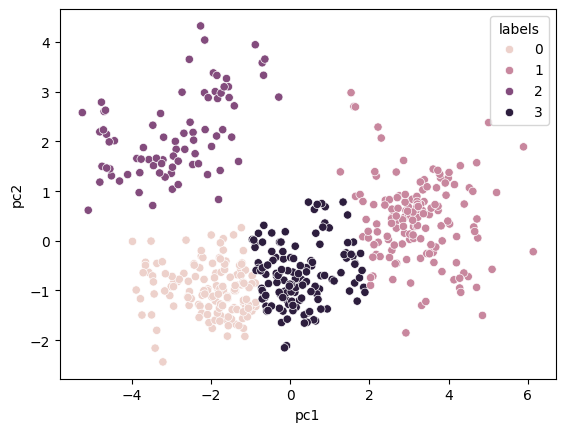

In [22]:
sns.scatterplot(x='pc1', y='pc2', hue='labels', data=data2)

어떤 그룹의 집 값이 가장 높을 것인가를 평균으로 비교한다.

In [23]:
# 각 그룹의 집값 평균을 구하기 위해 처음에 저장해 주었던 medv 컬럼을 data2의 medv 컬럼으로 추가
data2['medv'] = medv

In [24]:
data2.head()

,pc1,pc2,labels,medv
0,-1.997030,0.116612,0,24.0
1,-1.342724,-0.682635,0,21.6
2,-2.464487,1.534938,2,34.7
3,-2.979402,1.039243,2,33.4
4,-2.831358,1.131941,2,36.2


In [25]:
data2[data2['labels']==0]['medv'].mean()

22.94125874125874

In [26]:
medv_list = []

for i in range(4):
    medv_avg = data2[data2['labels']==i]['medv'].mean()
    medv_list.append(medv_avg)

<Axes: >

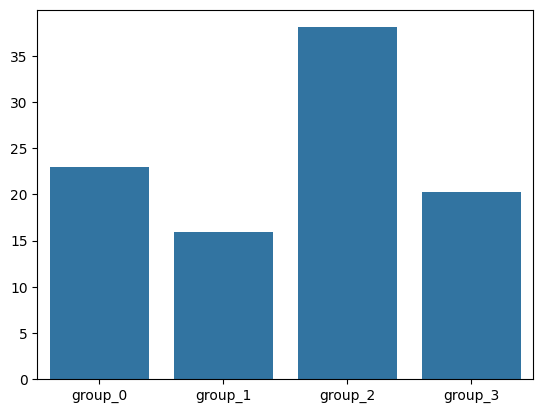

In [27]:
sns.barplot(x=['group_0', 'group_1', 'group_2', 'group_3'], y=medv_list)

집값의 평균 최상위 그룹 : group_3
집값의 평균 최하위 그룹 : group_2
따라서 최상위 그룹과 최하위 그룹을 비교하여 집값의 평균이 높거나 낮은 이유를 알아본다.

In [28]:
data['labels'] = data2['labels'] # 원본데이터에 그룹 labels를 추가
group = data[(data['labels']==2) | (data['labels']==3)] # 그룹 2, 3만 선택하여 group 변수에 저장
group = group.groupby('labels').mean().reset_index()
# gropuby를 사용하여 labels 컬럼 별로 모든 컬럼의 평균값을 구하고, groupby로 인하여 
# 인덱스가 되었던 labels를 reset_index()를 이용하여 다시 컬럼으로 변경
group

,labels,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT. MEDV
0,2,0.291580,32.367089,4.713418,0.485252,7.365772,53.975949,4.552910,4.531646,282.101266,16.059494,389.463924,5.105443,1.0
1,3,0.716516,0.638060,12.160000,0.547664,6.057172,79.929104,3.158535,5.552239,351.671642,18.993284,377.067537,13.899403,0.0


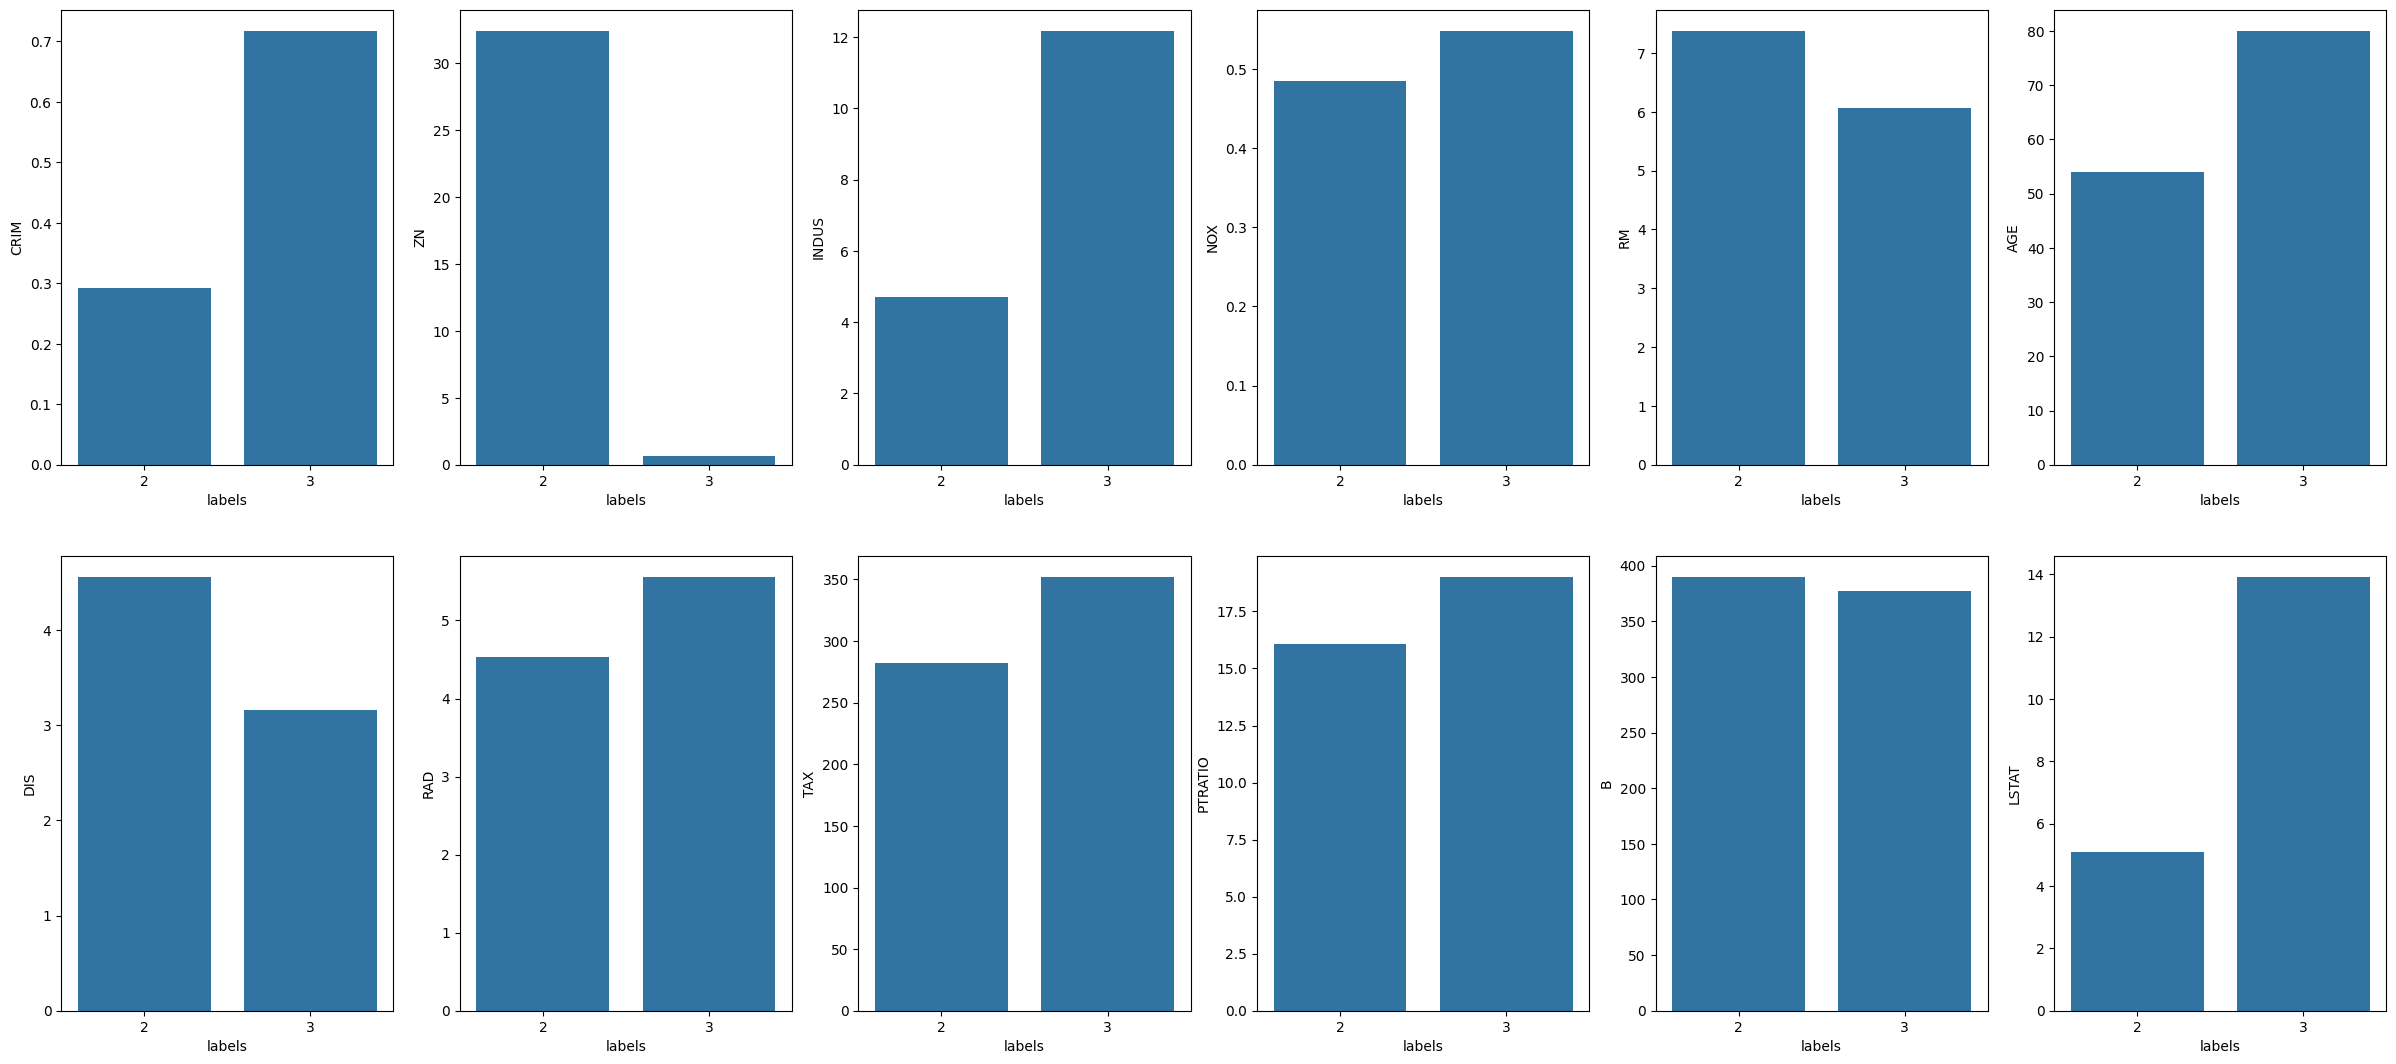

In [29]:
column = group.columns
fig, ax = plt.subplots(2, 6, figsize=(30, 13))

for i in range(12):
    sns.barplot(x='labels', y=column[i+1], data=group, ax=ax[i//6, i%6])

결론
- (0,0) 위치의 그래프를 보면 crim( 범죄율 )이 0번 그룹에서 월등히 높다. 이는 범죄율이 높을수록 집값이 낮다고 해석할 수 있다. 